In [1]:
import numpy as np
import sys
import os
import glob
import getpass
import argparse
import pickle
import matplotlib.cm as cm
import matplotlib.pyplot as plt


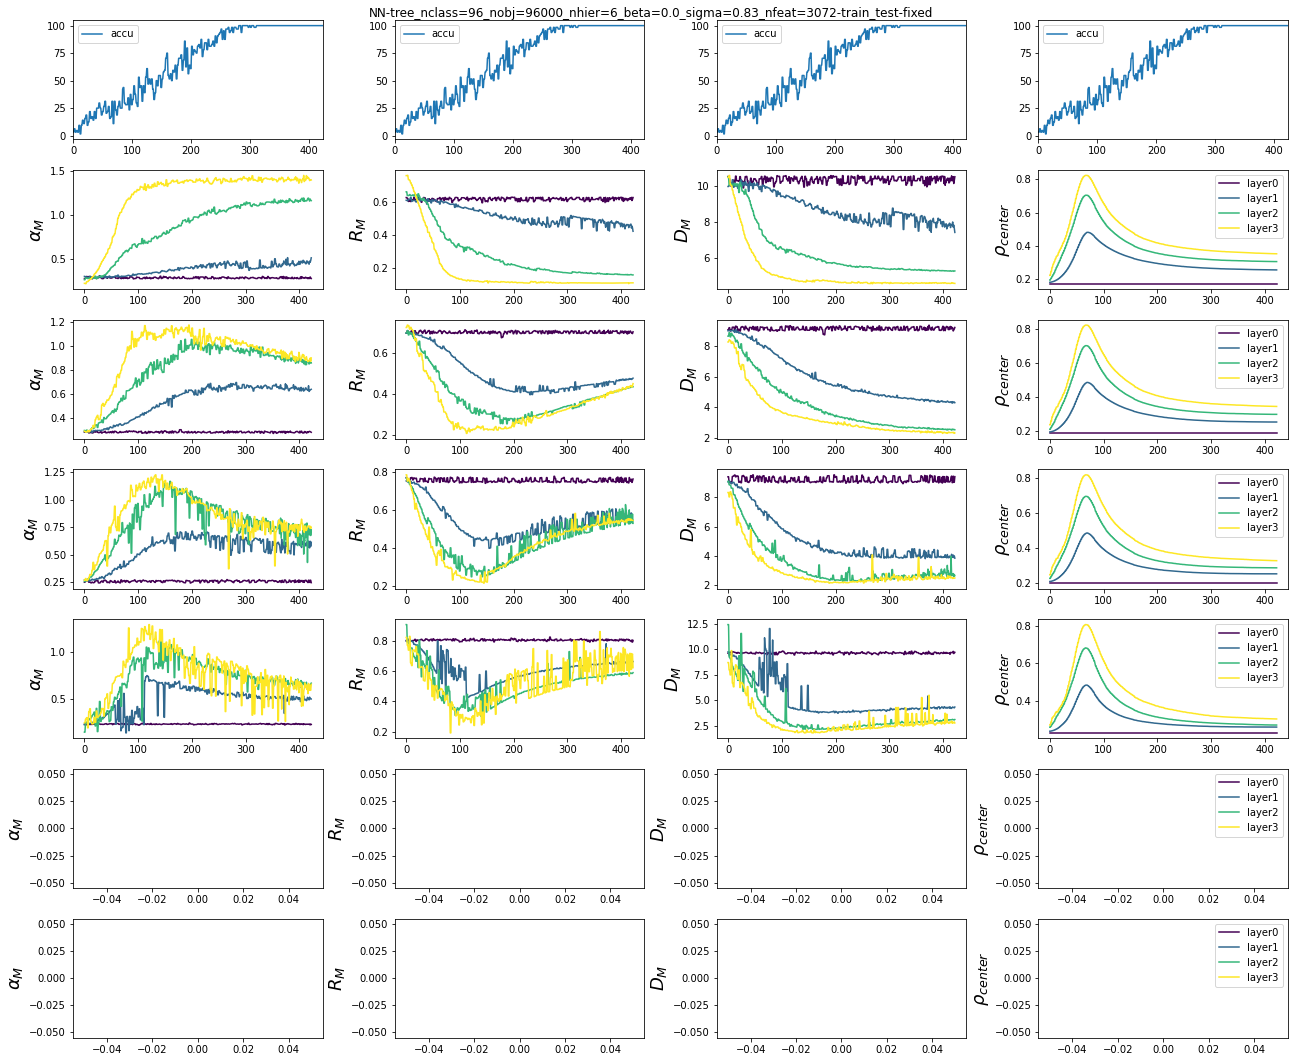

In [9]:
from utils import save_dir, analyze_dir
model_identifier = 'NN-tree_nclass=96_nobj=96000_nhier=6_beta=0.0_sigma=0.83_nfeat=3072-train_test-fixed'
analyze_identifier= 'mftma-exm_per_class=50-proj=False-rand=False-kappa=0-n_t=300-n_rep=1'
#NN-partition_nclass=100_nobj=100000_nhier=1_beta=0.0_sigma=0.83_nfeat=3072-train_test-fixed \
#NN-partition_nclass=50_nobj=50000_nhier=1_beta=0.0_sigma=0.83_nfeat=3072-train_test-fixed \
#NN-partition_nclass=64_nobj=64000_nhier=1_beta=0.0_sigma=0.83_nfeat=3072-train_test-fixed \
#NN-partition_nclass=64_nobj=64000_nhier=1_beta=0.02_sigma=0.83_nfeat=3072-train_test-fixed \
#NN-partition_nclass=64_nobj=64000_nhier=1_beta=0.02_sigma=2.5_nfeat=3072-train_test-fixed \
#NN-partition_nclass=96_nobj=96000_nhier=1_beta=0.0_sigma=2.5_nfeat=3072-train_test-fixed \
#NN-partition_nclass=96_nobj=96000_nhier=1_beta=0.02_sigma=0.83_nfeat=3072-train_test-fixed \
#             NN-partition_nclass=96_nobj=96000_nhier=1_beta=0.02_sigma=2.5_nfeat=3072-train_test-fixed \
#             NN-tree_nclass=50_nobj=50000_nhier=3_beta=0.02_sigma=0.83_nfeat=3072-train_test-fixed \
#             NN-tree_nclass=100_nobj=100000_nhier=4_beta=0.02_sigma=0.83_nfeat=3072-train_test-fixed \
#             NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.0_sigma=0.83_nfeat=3072-train_test-fixed \
#             NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.0_sigma=2.5_nfeat=3072-train_test-fixed \
#             NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.02_sigma=0.83_nfeat=3072-train_test-fixed \
#             NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.02_sigma=2.5_nfeat=3072-train_test-fixed \
#             NN-tree_nclass=96_nobj=96000_nhier=6_beta=0.0_sigma=2.5_nfeat=3072-train_test-fixed \
#             NN-tree_nclass=96_nobj=96000_nhier=6_beta=0.02_sigma=0.83_nfeat=3072-train_test-fixed \
#             NN-tree_nclass=96_nobj=96000_nhier=6_beta=0.02_sigma=2.5_nfeat=3072-train_test-fixed

data_=pickle.load(open(os.path.join(save_dir,model_identifier, f'{model_identifier}_mftma_pooled.pkl'), 'rb'))

mftma_res=data_['mftma_results']
if not os.path.exists(os.path.join(analyze_dir,model_identifier,analyze_identifier)):
        os.makedirs(os.path.join(analyze_dir,model_identifier,analyze_identifier))
temp=[np.asarray([x['seq'] for x in mftma_res[y]]) for y in mftma_res.keys()]
y=temp[0]
for k in temp:
    y=np.intersect1d(y,k)


num_hier=np.unique([len(x['mftma']) for x in mftma_res['layer_0_Input']])
fig, axes = plt.subplots(6+1, 4, figsize=(18, 15))
axes=axes.flatten()
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
seq=[x['seq'] for x in mftma_res['layer_0_Input']]
accu=[x['test_acc'] for x in mftma_res['layer_0_Input']]
for k in range(4):
    im=axes[k].plot(seq,accu)
    axes[k].legend(['accu'])
    axes[k].set_xlim(min(seq), max(seq))
for k in range(int(num_hier)):
    temp=[[x['mftma'][k]['capacities'] for x in mftma_res[y]] for y in mftma_res.keys()]
    cap=[[x[int(k)] for k in y ] for x in temp]
    seq_temp=[seq[int(k)] for k in y ]
    h0=cm.get_cmap('viridis_r',len(cap))
    h0_c=np.flipud(h0(np.arange(len(cap))/len(cap)))
    for i,c in enumerate(cap):
        im=axes[4*(k+1)].plot(seq_temp,c,color=h0_c[i,:],label=str(i))
    axes[4*(k+1)].set_ylabel(r'$\alpha_M$', fontsize=18)
    #fig.colorbar(im, ax=axes[4*(k+1)])
    
    
    temp=[[x['mftma'][k]['radii'] for x in mftma_res[y]] for y in mftma_res.keys()]
    rad=[[x[int(k)] for k in y ] for x in temp]
    for i,c in enumerate(rad):
        im=axes[4*(k+1)+1].plot(seq_temp,c,color=h0_c[i,:],label=str(i))
    axes[4*(k+1)+1].set_ylabel(r'$R_M$', fontsize=18)
    
    temp=[[x['mftma'][k]['dimensions'] for x in mftma_res[y]] for y in mftma_res.keys()]
    dim=[[x[int(k)] for k in y ] for x in temp]
    for i,c in enumerate(dim):
        im=axes[4*(k+1)+2].plot(seq_temp,c,color=h0_c[i,:],label=str(i))
    
    axes[4*(k+1)+2].set_ylabel(r'$D_M$', fontsize=18)
    
    
    temp=[[x['mftma'][k]['correlations'] for x in mftma_res[y]] for y in mftma_res.keys()]
    cor=[[x[int(k)] for k in y ] for x in temp]
    for i,c in enumerate(cor):
        im=axes[4*(k+1)+3].plot(seq_temp,c,color=h0_c[i,:],label='layer'+str(i))
        
    axes[4*(k+1)+3].set_ylabel(r'$\rho_{center}$', fontsize=18)
    axes[4*(k+1)+3].legend()

plt.suptitle(model_identifier)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(analyze_dir,model_identifier,analyze_identifier,'manifold_vals_during_training.png'),transparent=True)


In [7]:
y

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

array([6])

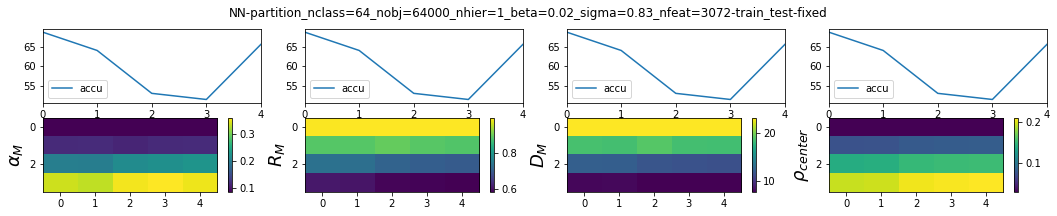

In [90]:
mftma_res=data_['mftma_results']
if not os.path.exists(os.path.join(analyze_dir,model_identifier,analyze_identifier)):
        os.makedirs(os.path.join(analyze_dir,model_identifier,analyze_identifier))
temp=[np.asarray([x['seq'] for x in mftma_res[y]]) for y in mftma_res.keys()]
y=temp[0]
for k in temp:
    y=np.intersect1d(y,k)


num_hier=np.unique([len(x['mftma']) for x in mftma_res['layer_0_Input']])
fig, axes = plt.subplots(int(num_hier)+1, 4, figsize=(18, int(num_hier)*3))
axes=axes.flatten()
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
seq=[x['seq'] for x in mftma_res['layer_0_Input']]
accu=[x['test_acc'] for x in mftma_res['layer_0_Input']]
for k in range(4):
    im=axes[k].plot(seq,accu)
    axes[k].legend(['accu'])
    axes[k].set_xlim(min(seq), max(seq))
for k in range(int(num_hier)):
    temp=[[x['mftma'][k]['capacities'] for x in mftma_res[y]] for y in mftma_res.keys()]
    cap=np.stack([[x[int(k)] for k in y ] for x in temp]).squeeze()
    im=axes[4*(k+1)].imshow(cap,aspect='auto')
    axes[4*(k+1)].set_ylabel(r'$\alpha_M$', fontsize=18)
    fig.colorbar(im, ax=axes[4*(k+1)])
    
    
    temp=[[x['mftma'][k]['radii'] for x in mftma_res[y]] for y in mftma_res.keys()]
    rad=np.stack([[x[int(k)] for k in y ] for x in temp]).squeeze()
    im=axes[4*(k+1)+1].imshow(rad,aspect='auto')
    axes[4*(k+1)+1].set_ylabel(r'$R_M$', fontsize=18)
    fig.colorbar(im, ax=axes[4*(k+1)+1])
    
    temp=[[x['mftma'][k]['dimensions'] for x in mftma_res[y]] for y in mftma_res.keys()]
    dim=np.stack([[x[int(k)] for k in y ] for x in temp]).squeeze()
    im=axes[4*(k+1)+2].imshow(dim,aspect='auto')
    axes[4*(k+1)+2].set_ylabel(r'$D_M$', fontsize=18)
    fig.colorbar(im, ax=axes[4*(k+1)+2])
    
    temp=[[x['mftma'][k]['correlations'] for x in mftma_res[y]] for y in mftma_res.keys()]
    cor=np.stack([[x[int(k)] for k in y ] for x in temp]).squeeze()
    im=axes[4*(k+1)+3].imshow(cor,aspect='auto')
    axes[4*(k+1)+3].set_ylabel(r'$\rho_{center}$', fontsize=18)
    fig.colorbar(im, ax=axes[4*(k+1)+3])

plt.suptitle(model_identifier)
#plt.tight_layout()
plt.show()
fig.savefig(os.path.join(analyze_dir,model_identifier,analyze_identifier,'manifold_vals_during_training.png'),transparent=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])